# 03_Debt_Management_Analysis.ipynb

## Title: "Debt Management and Solvency Assessment"

### Contents:

- Analyzing debt-related metrics from SEC data.
- Comparing with debt_management_query.sql results.
- Calculating debt ratios and solvency measures.
- Visualizations and debt profile analysis.

---

# Set Up the Environment

## Import Libraries

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

## Functions

In [2]:
def prepare_and_sort_financial_data(df, metric):
    """
    Prepares and sorts financial data for a specific metric.

    Args:
    df (DataFrame): The raw DataFrame containing financial data.
    metric (str): The specific financial metric to prepare and sort (e.g., 'OperatingIncomeLoss').

    Returns:
    DataFrame: A DataFrame filtered, cleaned, and sorted for the specific metric.
    """
    # Filter by Metric
    df_metric = df[df['Metric'] == metric]

    # Filter for 10-K filings and ensure 'frame' column is not empty
    filtered_df = df_metric[df_metric['form'] == '10-K']
    filtered_df = filtered_df[filtered_df['frame'].notna()]

    # Drop unnecessary columns
    columns_to_drop = ['accn', 'fy', 'fp', 'form', 'filed']
    filtered_df_cleaned = filtered_df.drop(columns=columns_to_drop)

    # Define a custom sorting key and split into 'year' and 'quarter'
    def custom_sort_key(frame_value):
        year = frame_value[2:6]  # Extract the year part (e.g., '2007')
        quarter_order = {'Q1': 1, 'Q2': 2, 'Q3': 3, 'Q4': 4, 'FY': 5}  # Define order for quarters and FY
        quarter = frame_value[6:] if frame_value[6:] in quarter_order else 'FY'
        return (year, quarter_order[quarter])

    filtered_df_cleaned[['year', 'quarter']] = filtered_df_cleaned['frame'].apply(custom_sort_key).apply(pd.Series)

    # Sort the DataFrame and drop the 'frame' and 'frame_sort_key' columns
    sorted_df = filtered_df_cleaned.sort_values(by=['year', 'quarter']).drop(columns=['frame'])

    return sorted_df

# Example usage with multiple metrics
# operating_income_loss_data = prepare_and_sort_financial_data(raw_data, 'OperatingIncomeLoss')
# net_income_loss_data = prepare_and_sort_financial_data(raw_data, 'NetIncomeLoss')
# revenues_data = prepare_and_sort_financial_data(raw_data, 'Revenues')


# Load Data

## Load Data from CSV File

In [3]:
raw_data = pd.read_csv('combined_df.csv')

In [4]:
# Inspect the first few rows of the dataset
raw_data.head(2)

,EntityName,CIK,Metric,end,val,accn,fy,fp,form,filed,frame
0,THE BOEING COMPANY,12927,Assets,2008-12-31,53779000000,0001193125-09-152905,2009,Q2,10-Q,2009-07-22,NaN
1,THE BOEING COMPANY,12927,Assets,2008-12-31,53779000000,0001193125-09-210918,2009,Q3,10-Q,2009-10-21,NaN


In [5]:
# Convert 'end' column to datetime for proper sorting
raw_data['end'] = pd.to_datetime(raw_data['end'], format='%Y-%m-%d')


In [6]:
# Check the data types and look for any missing values
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   EntityName  278 non-null    object        
 1   CIK         278 non-null    int64         
 2   Metric      278 non-null    object        
 3   end         278 non-null    datetime64[ns]
 4   val         278 non-null    int64         
 5   accn        278 non-null    object        
 6   fy          278 non-null    int64         
 7   fp          278 non-null    object        
 8   form        278 non-null    object        
 9   filed       278 non-null    object        
 10  frame       144 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 24.0+ KB


# Individual Metrics Analysis

## Analysis of Assets

In [7]:
# Filter out the Assets
assets = raw_data[raw_data['Metric'] == 'Assets']

In [8]:
assets_data = prepare_and_sort_financial_data(raw_data, 'Assets')

In [9]:
assets_data.head(2)

,EntityName,CIK,Metric,end,val,year,quarter
2,THE BOEING COMPANY,12927,Assets,2008-12-31,53779000000,2008,5
9,THE BOEING COMPANY,12927,Assets,2009-12-31,62053000000,2009,5


In [10]:
print(assets_data.describe())

           CIK                            end           val  quarter
count     14.0                             14  1.400000e+01     14.0
mean   12927.0  2015-07-01 18:51:25.714285824  9.837871e+10      5.0
min    12927.0            2008-12-31 00:00:00  5.377900e+10      5.0
25%    12927.0            2012-03-31 12:00:00  8.221350e+10      5.0
50%    12927.0            2015-07-01 12:00:00  9.279200e+10      5.0
75%    12927.0            2018-09-30 18:00:00  1.161098e+11      5.0
max    12927.0            2021-12-31 00:00:00  1.521360e+11      5.0
std        0.0                            NaN  2.918912e+10      0.0


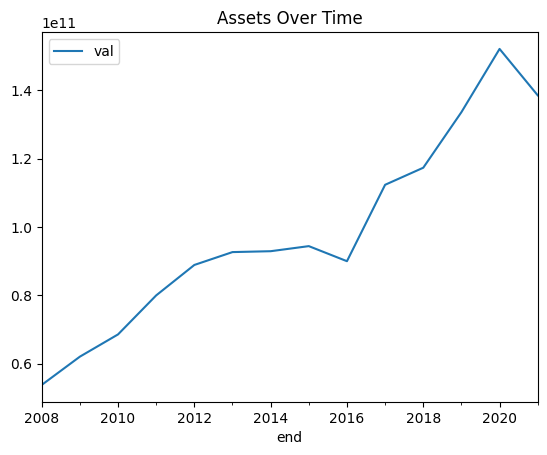

In [11]:
assets_data.plot(x='end', y='val', title='Assets Over Time')
plt.show()

## Analysis of Stockholders Equity

In [12]:
stockholders_equity = raw_data[raw_data['Metric'] == 'StockholdersEquity']

In [13]:
stockholders_equity_data = prepare_and_sort_financial_data(raw_data, 'StockholdersEquity')

In [14]:
stockholders_equity_data.head(2)

,EntityName,CIK,Metric,end,val,year,quarter
164,THE BOEING COMPANY,12927,StockholdersEquity,2008-12-31,-1294000000,2008,5
171,THE BOEING COMPANY,12927,StockholdersEquity,2009-12-31,2128000000,2009,5


           CIK                            end           val  quarter
count     14.0                             14  1.400000e+01     14.0
mean   12927.0  2015-07-01 18:51:25.714285824  2.669286e+08      5.0
min    12927.0            2008-12-31 00:00:00 -1.831600e+10      5.0
25%    12927.0            2012-03-31 12:00:00 -8.857500e+08      5.0
50%    12927.0            2015-07-01 12:00:00  1.892000e+09      5.0
75%    12927.0            2018-09-30 18:00:00  5.279000e+09      5.0
max    12927.0            2021-12-31 00:00:00  1.487500e+10      5.0
std        0.0                            NaN  8.919884e+09      0.0


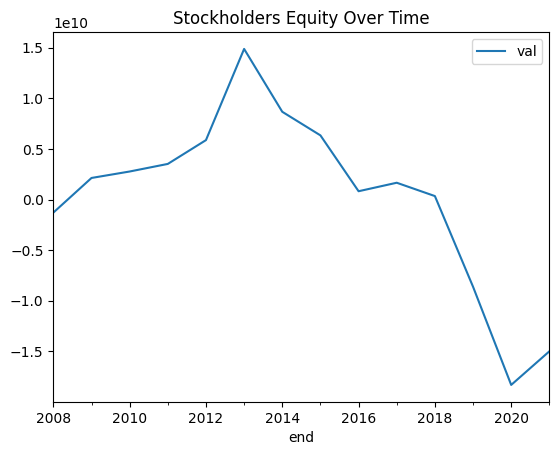

In [15]:
print(stockholders_equity_data.describe())
stockholders_equity_data.plot(x='end', y='val', title='Stockholders Equity Over Time')
plt.show()


## Analysis of Liabilities

In [16]:
# Filter out the Liabilities data
liabilities_loss = raw_data[raw_data['Metric'] == 'Liabilities']

In [17]:
liabilities_data = prepare_and_sort_financial_data(raw_data, 'Liabilities')

In [18]:
liabilities_data.head(2)

,EntityName,CIK,Metric,end,val,year,quarter
122,THE BOEING COMPANY,12927,Liabilities,2010-12-31,65703000000,2010,5
135,THE BOEING COMPANY,12927,Liabilities,2019-12-31,141925000000,2019,5


           CIK                  end           val  quarter
count      4.0                    4  4.000000e+00      4.0
mean   12927.0  2018-07-01 12:00:00  1.328092e+11      5.0
min    12927.0  2010-12-31 00:00:00  6.570300e+10      5.0
25%    12927.0  2017-09-30 06:00:00  1.228695e+11      5.0
50%    12927.0  2020-07-01 00:00:00  1.476615e+11      5.0
75%    12927.0  2021-04-01 06:00:00  1.576012e+11      5.0
max    12927.0  2021-12-31 00:00:00  1.702110e+11      5.0
std        0.0                  NaN  4.622097e+10      0.0


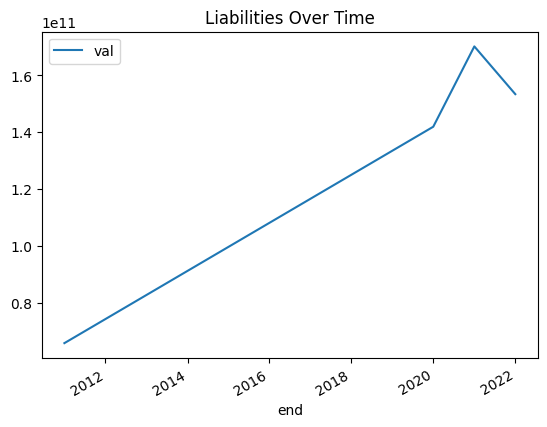

In [19]:
print(liabilities_data.describe())
liabilities_data.plot(x='end', y='val', title='Liabilities Over Time')
plt.show()


# Merge the Data

In [20]:
df_merged = pd.merge(assets_data, stockholders_equity_data, 
                     on=['EntityName', 'CIK', 'end', 'year', 'quarter'], 
                     how='outer', suffixes=('_assets', '_stockholders_equity'))

In [21]:
df_merged = pd.merge(df_merged, liabilities_data, 
                     on=['EntityName', 'CIK', 'end', 'year', 'quarter'], 
                     how='outer')
                     

In [22]:
df_merged.rename(columns={'val_assets': 'Assets', 
                          'val_stockholders_equity': 'StockholdersEquity', 
                          'val': 'Liabilities'}, inplace=True)

In [23]:
# Filtering out the annual data (rows where quarter is '5')
#df_merged_quarterly = df_merged[df_merged['quarter']] #!= 5]

In [24]:
df_merged

,EntityName,CIK,Metric_assets,end,Assets,year,quarter,Metric_stockholders_equity,StockholdersEquity,Metric,Liabilities
0,THE BOEING COMPANY,12927,Assets,2008-12-31,53779000000,2008,5,StockholdersEquity,-1294000000,NaN,NaN
1,THE BOEING COMPANY,12927,Assets,2009-12-31,62053000000,2009,5,StockholdersEquity,2128000000,NaN,NaN
2,THE BOEING COMPANY,12927,Assets,2010-12-31,68565000000,2010,5,StockholdersEquity,2766000000,Liabilities,6.570300e+10
3,THE BOEING COMPANY,12927,Assets,2011-12-31,79986000000,2011,5,StockholdersEquity,3515000000,NaN,NaN
4,THE BOEING COMPANY,12927,Assets,2012-12-31,88896000000,2012,5,StockholdersEquity,5867000000,NaN,NaN
5,THE BOEING COMPANY,12927,Assets,2013-12-31,92663000000,2013,5,StockholdersEquity,14875000000,NaN,NaN
6,THE BOEING COMPANY,12927,Assets,2014-12-31,92921000000,2014,5,StockholdersEquity,8665000000,NaN,NaN
7,THE BOEING COMPANY,12927,Assets,2015-12-31,94408000000,2015,5,StockholdersEquity,6335000000,NaN,NaN
8,THE BOEING COMPANY,12927,Assets,2016-12-31,89997000000,2016,5,StockholdersEquity,817000000,NaN,NaN
9,THE BOEING COMPANY,12927,Assets,2017-12-31,112362000000,2017,5,StockholdersEquity,1656000000,NaN,NaN


# Calculation

**Assets and Liabilities:**
    
    - `Assets`
    - `Liabilities`
    - `StockholdersEquity` (Equity)
    - **Calculation:** To assess financial health, compare total assets against total liabilities. The equity figure provides additional context.

In [25]:
# Start by creating a copy of the DataFrame to avoid SettingWithCopyWarning
df_final = df_merged.copy()

In [26]:
# Convert financial values from cents to millions for readability
df_final['Assets'] /= 1000000
df_final['StockholdersEquity'] /= 1000000
df_final['Liabilities'] /= 1000000

In [27]:
# Calculate Asset to Liability Ratio and Debt to Equity Ratio where data is available
df_final['AssetToLiabilityRatio'] = df_final.apply(lambda row: row['Assets'] / row['Liabilities'] if pd.notna(row['Liabilities']) else None, axis=1)
df_final['DebtToEquityRatio'] = df_final.apply(lambda row: row['Liabilities'] / row['StockholdersEquity'] if pd.notna(row['Liabilities']) and pd.notna(row['StockholdersEquity']) else None, axis=1)


In [28]:
# Construct the 'Quarter' column
df_final['Quarter'] = df_final['year'].astype(str) + '-Q' + df_final['quarter'].astype(str)
# Construct the 'Quarter' column for annual data
#df_final['Quarter'] = 'FY-' + df_final['year'].astype(str)

In [29]:
# Selecting and renaming columns to match the desired format
df_final = df_final[['EntityName', 'CIK', 'end', 'Assets', 'Liabilities', 'StockholdersEquity', 'AssetToLiabilityRatio', 'DebtToEquityRatio', 'Quarter']]


In [30]:
df_copy = df_final.copy()
df_copy.rename(columns={'EntityName': 'ENTITY', 'end': 'DATE'}, inplace=True)

In [35]:
df_copy.head(2)

,ENTITY,CIK,DATE,Assets,Liabilities,StockholdersEquity,AssetToLiabilityRatio,DebtToEquityRatio,Quarter
0,THE BOEING COMPANY,12927,2008-12-31,53779.0,NaN,-1294.0,NaN,NaN,2008-Q5
1,THE BOEING COMPANY,12927,2009-12-31,62053.0,NaN,2128.0,NaN,NaN,2009-Q5


# Visualization

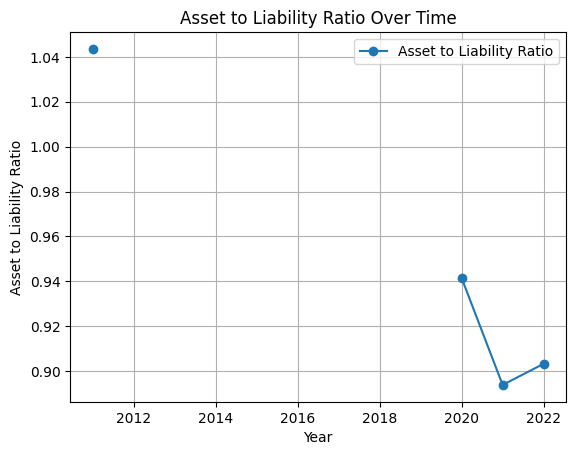

In [38]:
# Plotting Asset to Liability Ratio
plt.plot(df_copy['DATE'], df_copy['AssetToLiabilityRatio'], marker='o', label='Asset to Liability Ratio')
plt.title('Asset to Liability Ratio Over Time')
plt.xlabel('Year')
plt.ylabel('Asset to Liability Ratio')
plt.grid(True)
plt.legend()

plt.show()


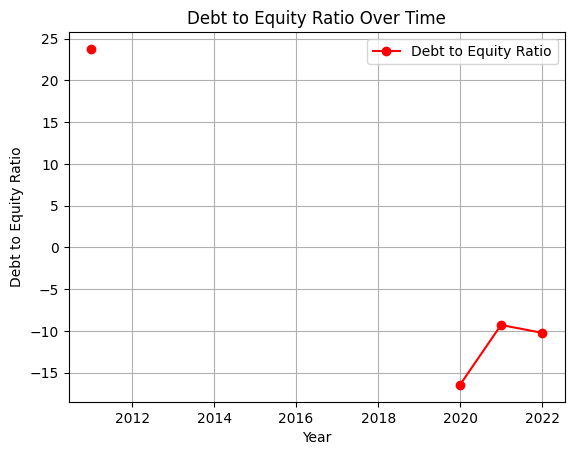

In [41]:
# Plotting Debt to Equity Ratio
plt.plot(df_copy['DATE'], df_copy['DebtToEquityRatio'], marker='o', color='red', label='Debt to Equity Ratio')
plt.title('Debt to Equity Ratio Over Time')
plt.xlabel('Year')
plt.ylabel('Debt to Equity Ratio')
plt.grid(True)
plt.legend()

plt.show()